# Tutorial 3: Algorithm Analysis
------------------------------------------------
Brady Kieffer - <bwkieffe@edu.uwaterloo.ca>

All of the tutorial related code / other documents will be on d2l as well as [this](https://github.com/bradykieffer/syde223) git repo.

This tutorial will cover concepts from chapter 3 of the textbook. I like using Jupyter notebooks as a way to try out code. If you want to learn more about installing Jupyter on your own machine just go [here](http://jupyter.org/).

## Introduction
-------------------

![algorithm-analysis](https://imgs.xkcd.com/comics/algorithms.png)

- When we want to classify either algorithms or datastructures as "good" we need some method of comparing them
- Typically, we analyze the running time of algorithms.
- We can also look at memory usage
- Focusing on running time means we get to use math!

However, we can also illustrate algorithm complexity using real examples. Let's first look at a basic example for measuring performance.

In [1]:
# Imports for graphing used later
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')  # This is almost never a good idea
sns.set()

%matplotlib inline

In [2]:
import time 

def my_algorithm(should_print=True):
    if should_print:
        print('This is a contrived example.')
    time.sleep(0.1)  # Sleep for 0.1ms 

In [3]:
# How long will my_algorithm take?
start_time = time.time()
my_algorithm()
end_time = time.time()
elapsed = end_time - start_time

print(f'It took {elapsed:0.2f}ms to run my_algorithm.')

This is a contrived example.
It took 0.10ms to run my_algorithm.


What if I want to test this for multiple runs? Would need to record the runtime for each run, average them, report the standard deviation etc.

Or we use a utility in jupyter `%timeit`

In [4]:
%timeit my_algorithm(should_print=False)

100 ms ± 19 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


You can even test out blocks of code using `%%timeit`

In [5]:
%%timeit
n = 0
for i in range(100):
    for j in range(100):
        n += 1

550 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


This sort of analysis is known as **experimental analysis**. 


It would be much more beneficial to come up with a series metrics to measure general algorithmic complexity. We need to develop measures that will allow us to do the following: 

1. Compare two algorithms without worrying about hardware / software implementation differences
2. Allow us to perform evaluation without actually implementing the algorithm
3. Take into account all possible inputs

While experimental analysis may be difficult, in this tutorial we will look at examples of different algorithm runtimes using utilities built into Jupyter notebooks.

## Primitive Operations

The textbook begins this process by first looking at **primitive operations**. A primitive operation is one in which the runtime of the operation effectively remains constant. There are a plethora of specific examples of primitive operations, literally a list in the text (pg 113). The running time of an algorithm will be directly proportional to the number of primitive operations it has.

## Measuring Operations as a Function of Input Size

To capture the growth of an algorithm's running time, we can assign a function $f(n)$ to the size of the input (number of primitive operations). We will then analyze the **worst-case** running time for that algorithm given a bounding function for $f(n)$. 

What does this all mean in practice? We will look at some common functions and how they scale as a function of input size. Specifically, the textbook looks at the following functions:

- The constant function $f(n) = c$
- The logarithm function (base 2) $f(n) = log(n)$
- The linear function $f(n) = n$
- The N-Log-N function $f(n) = nlog(n)$
- The quadratic function $f(n) = n^2$
- The exponential function $f(n) = b^n$
- Other polynomial functions

But how do these actually scale with respect to one another? Let's use the provided functions to analyze this.

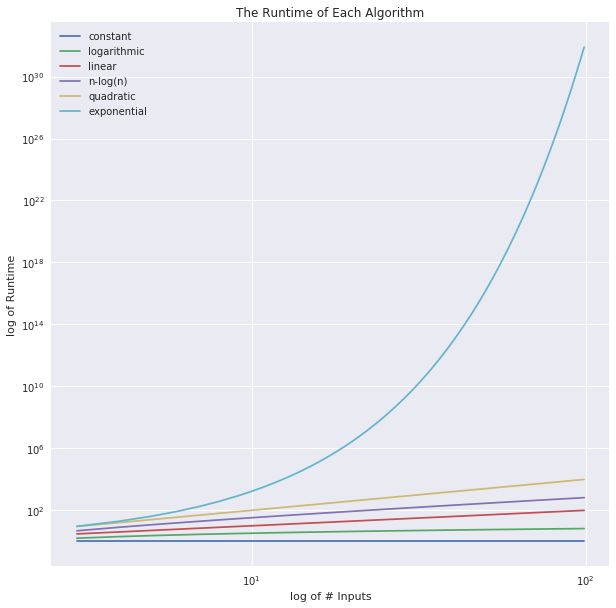

In [6]:
# Let's gather a list of the runtimes for an algorithm
import numpy as np

n_inputs = list(range(3, 100))

runtimes = {
    'constant': [1 for n in n_inputs],
    'logarithmic': [np.log2(n) for n in n_inputs],
    'linear': [n for n in n_inputs],
    'n-log(n)': [n * np.log2(n) for n in n_inputs],
    'quadratic': [n * n for n in n_inputs],
    'exponential': [2.1 ** n for n in n_inputs]
}

plt.figure(figsize=(10, 10))
for label, runtime in runtimes.items():
    plt.loglog(n_inputs, runtime, label=label)

# Plot the results
plt.legend()
plt.ylabel('log of Runtime')
plt.xlabel('log of # Inputs')
plt.title('The Runtime of Each Algorithm')
plt.show()

As we can see, different functions will have wildly different runtimes.

All of this is great, but how does it connect with actual algorithms? In reality, we only need to analyze the worst-case runtime of an algorithm. This means that if we can come up with a function that models the runtime of our algorithm with respect to the number of inputs, we should be able to realize the worst-case runtime. 

## Asymptotic Analysis and "Big-Oh" Notation

This is all great, but we should investigate examples of different scaling in Python:

### O(1) 
This is relatively simple to do:

In [7]:
def constant(n):
    a = n
    b = n - 1
    
    c = n % 4
    d = n / 6
    return a - b, c, d

print(constant(12))

(1, 0, 2.0)


### O(n) 
Occurs whenever we loop over something

In [8]:
def linear(n):
    l = range(n)  # 
    return [i + 2 for i in l]  # O(n)
        
linear(12)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

### O($n^2$)

In [9]:
def cubic(n):
    total = 0
    for i in range(n):  # O(n)
        for i in range(n):  # O(n)
            total += linear(n)  # O(n)
    return total


def linear(n):
    total = 0
    for i in range(n):
        total += 1 
        
    return total
            
cubic(100)

1000000

### O(log(n))

Not as easy to immediately see but this will start to appear later in the course

In [10]:
def logarithmic(array, to_find):  # Binary search
    offset = 0
    while len(array) >= 1:
        idx = len(array) // 2
        if array[idx] == to_find:
            return idx + offset
        
        if array[idx] < to_find:
            offset += idx
            array = array[idx:]
        else:
            array = array[:idx]
        
    return None

print(logarithmic(list(range(10)), 4))

4


### O(nlog(n))

Even weirder than O(log(n))

In [11]:
def bad_example(n):
    """ Found this gem on Quora """
    for _ in range(1, n + 1):
        time.sleep(np.log(n))  # Sleep for log(n) seconds
        
bad_example(10)

In [12]:
def linear_log(n):
    pass  # I did not learn anything better than that stupid n logn  n example. Sorry class, I can ask dr. tizhoosh
          # for further examples, post on learn if you want these

## 'Real' Examples
To find this worst-case runtime, we first get a function noting the number of operations performed relative to the number of inputs and then use a bounding function to denote the expected runtime. For example, consider the following algorithm which will find the smallest value in a list:

In [13]:
def get_runtime(algorithm, data, times=2):
    runtimes = []
    for _ in range(times):
        start = time.time()
        algorithm(data)
        end = time.time()
        runtimes.append(end - start)

    return np.mean(runtimes), np.std(runtimes)

def plot_runtimes(runtimes, n_inputs):
    mean_times = runtimes[:, 0]
    std_times = runtimes[:, 1]

    plt.figure(figsize=(15, 6))
    plt.errorbar(n_inputs, y=mean_times, yerr=std_times)
    plt.ylabel('Runtime')
    plt.xlabel('# Inputs')
    plt.title('The Runtime of find_min')
    plt.show()

In [14]:
def find_min(data):
    min_ = data[0]        # This is a constant operation, O(1)
    for value in data:    # A single loop is O(n)
        if value < min_:  # This comparison is O(1)
            min_ = value  # Assignments are O(1)
    return min_           # The return operation is O(1)

What is the runtime of this algorithm? We could perform experimental analysis to find out.

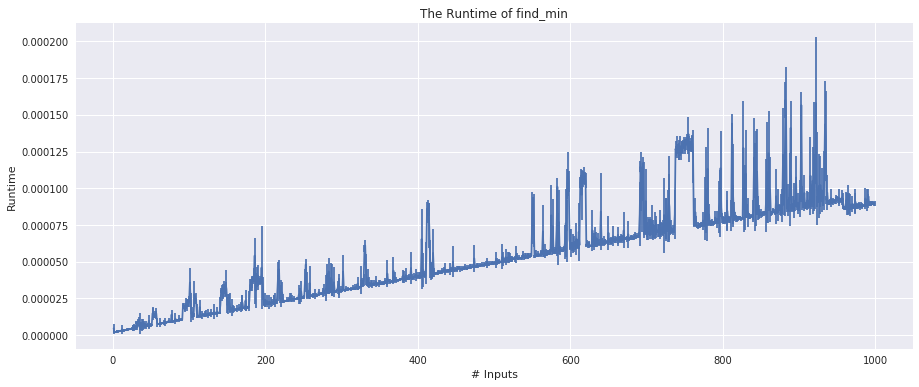

In [15]:
n_inputs = list(range(1, 1000))
runtimes = np.array([get_runtime(find_min, np.random.randn(n), times=10) for n in n_inputs])

plot_runtimes(runtimes, n_inputs)

This *appears* to be linear, but the measurements are subject to noise and the implementation details of the computer running this code. Instead we could note that this algorithm actually iterates over every element of the array checking if it is less than the current minimum and because we do this, the algorithm scales linearly with the number of inputs. When an algorithm scales linearly with the number of inputs, we can effectively bound it using a linear function, we then say that the algorithm has linear time complexity or is $O(n)$ ("Big-Oh-n").

Let's look at another example which will find the minimum value within a matrix:

In [16]:
def find_min_matrix(data):
    min_ = data[0, 0] # O(1)
    for row in data:  # O(n)
        for value in row:  # O(n)
            if value < min_:
                min_ = value

    return min_

How does this algorithm scale with input size? Assuming an $n \times n$ matrix, we note that each cell within the matrix must be checked, thus the expected runtime would be quadratic or $O(n^2)$.

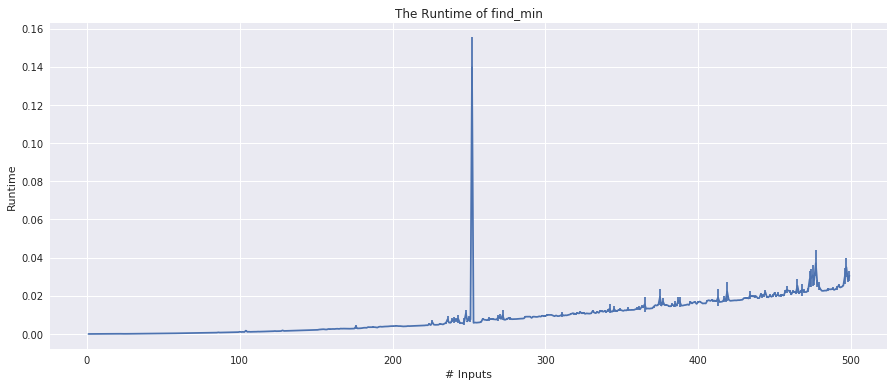

In [17]:
n_inputs = list(range(1, 500))
runtimes = np.array([get_runtime(find_min_matrix, np.random.randn(n, n), times=5) for n in n_inputs])

plot_runtimes(runtimes, n_inputs)

Finally, let's look at one more algorithm which will take a list, add one to each element, and then return the minimum of the list using the `find_min` function previously defined. What is the runtime of this algorithm? Why?

In [18]:
def my_algorithm(data):
    result = [d + 1 for d in data]  # O(n)
    result = find_min(result)       # O(n)
    return result                   # O(1)

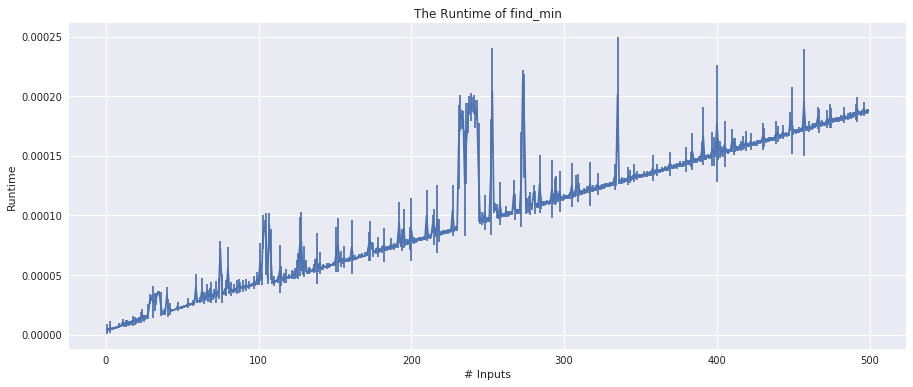

In [19]:
n_inputs = list(range(1, 500))
runtimes = np.array([get_runtime(my_algorithm, np.random.randn(n), times=10) for n in n_inputs])
plot_runtimes(runtimes, n_inputs)

## End of Tutorial 'Quiz'
It's [here](https://create.kahoot.it/).